In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. data injestion

### loading the data in scikit learn

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
df = load_diabetes()

In [4]:
# info are in key-value pair
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

# define problem statement : 
### To predicit disease progession one year after baseline provided 10 features
### To predict in one year how the suger level is changed (progression)

### based on BMI predict disease progression

In [5]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
df['data']

# or use df.data 
# this are in key val plair..so that we can access by key

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [7]:
df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
# make dataframe
data = pd.DataFrame(df.data, columns=df.feature_names)

In [10]:
# generally categorical cols should not scale down..
# here, it is scaled to just hide real and personal information 
# like sex

In [11]:
data['target'] = df.target

In [12]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


# 2. Perform Data cleaning, Data preprocessing

# 3. Perform EDA, Feature Engineering

In [13]:
# here data is alreading cleaned and prepared so no need to do it

# 4. Separate X (input var) and Y features (output var)
## simple linear regreesion...so, 1 independent and 1 dependent feature

In [14]:
x =  data[['bmi']]
y = data['target']

In [15]:
x , y

(          bmi
 0    0.061696
 1   -0.051474
 2    0.044451
 3   -0.011595
 4   -0.036385
 ..        ...
 437  0.019662
 438 -0.015906
 439 -0.015906
 440  0.039062
 441 -0.073030
 
 [442 rows x 1 columns],
 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438    104.0
 439    132.0
 440    220.0
 441     57.0
 Name: target, Length: 442, dtype: float64)

In [16]:
# plot training examples on a graph

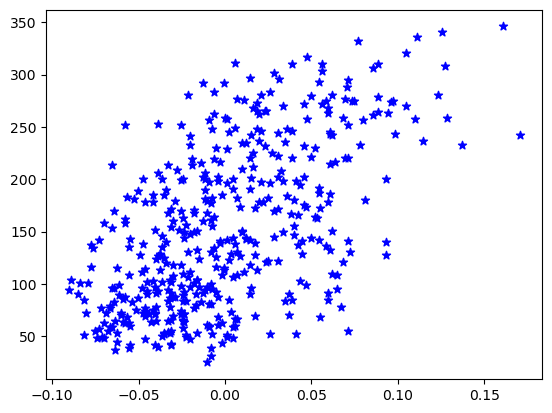

In [17]:
plt.scatter(x=x, y=y,marker='*', color='blue' )

In [18]:
# this dataset is suitable to use SLR

# 5. Train-Test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
# training data 
# model use this data for learning 
len(x_train), len(y_train)

(353, 353)

In [22]:
# testing data
# use this data to evaluate the model
len(x_test), len(y_test)

(89, 89)

In [23]:
x_train, y_train

(          bmi
 17   0.012117
 66  -0.018062
 137  0.049840
 245 -0.035307
 31  -0.065486
 ..        ...
 106 -0.076264
 270  0.030440
 348 -0.020218
 435 -0.023451
 102  0.028284
 
 [353 rows x 1 columns],
 17     144.0
 66     150.0
 137    280.0
 245    125.0
 31      59.0
        ...  
 106    134.0
 270    202.0
 348    148.0
 435     64.0
 102    302.0
 Name: target, Length: 353, dtype: float64)

# it is randomly splited

### Setting a specific value (e.g., random_state=42) ensures that the train-test split remains consistent every time you run the code.

### Without random_state, the split will be random each time, leading to slightly different train and test datasets.

# 6. scaling
### this is optional

# 7. model training 

In [24]:
from sklearn.linear_model import LinearRegression

# LinearRegression() is a class provided by the sklearn.linear_model module

In [25]:
# create object of LinearRegression class
model = LinearRegression()

In [26]:
# The fit() function trains the Linear Regression model
# by finding the best coefficients(slop w) and intercept(b).

# at backend it use gradient decent
model.fit(x_train,y_train)

LinearRegression()

In [27]:
# w
model.coef_

array([998.57768914])

In [28]:
# b
model.intercept_

152.00335421448167

In [29]:

# you can also take new brand input to predict it's y
y_pred = model.predict(x_train)

## Why Use x_train?
### To Plot the Best-Fit Line Over the Training Data

### The goal of plotting the regression line is to visualize how well the model fits the training data.
### By passing x_train to predict(), we obtain the corresponding predicted y values (y_pred) for the training data.
### This gives us the line that the model "learned" during training.

In [30]:
len(x_train)

353

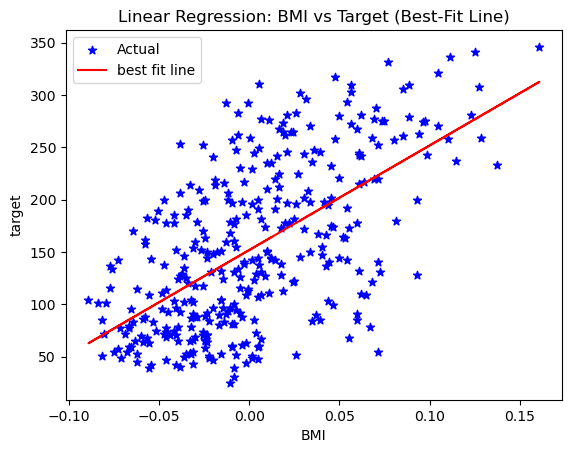

In [31]:
# visulize the result:
plt.scatter(x_train,y_train, color='blue',label='Actual', marker='*')
plt.plot(x_train, y_pred,color='red',label='best fit line')
plt.title('Linear Regression: BMI vs Target (Best-Fit Line)')
plt.xlabel('BMI')
plt.ylabel('target')
plt.legend()
plt.show()

### use x_test to test the model

In [48]:
y_pred = model.predict(x_test)

In [49]:
len(x_test)

89

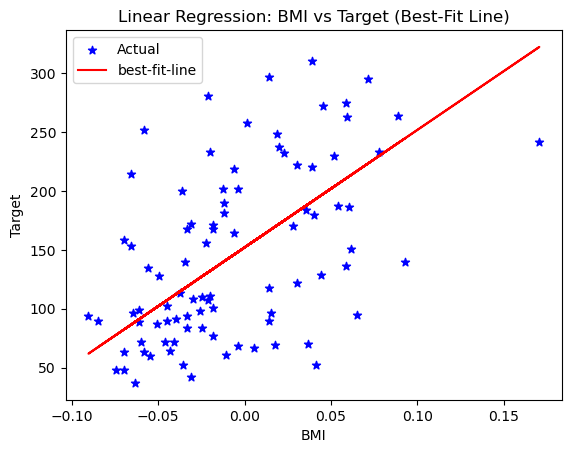

In [50]:
# visulize result 
plt.scatter(x_test, y_test, color='blue',label='Actual', marker='*')
plt.plot(x_test, y_pred, color='red', label='best-fit-line')
plt.title('Linear Regression: BMI vs Target (Best-Fit Line)')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()
plt.show()

# 8. Model evaluation

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_pred)

0.2333503981587215

### It indicates that the model is explaining only 23.3% of the variance in the target variable. This means the model is not performing very well.

# How to Improve the R² Score?

### 1. Add More Relevant Features
### 2. Check Correlation through heatmap  to identify which features are most correlated with the target.
### 3. Handle Non-Linearity: Use polynomial regression (add squared terms) to capture non-linear relationships.
### 4. identify and Remove Outliers
### 5. Use Regularization: Techniques like Ridge or Lasso regression can improve generalization.

# 9. Pickling of model

### pickle>> allows you to store the python object on the disk
### Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script

### serialization : Serialization is the process of converting a data structure or object into a format that can be easily stored, transmitted, or persisted. During serialization, the object's state is converted into a stream of bytes or other formats that can be written to disk, sent over a network, or stored in memory
### Deserialization>>Deserialization is the process of reconstructing a serialized object back into its original form. During deserialization, the serialized data is read and converted back into a data structure or object that matches the original.



In [58]:
import pickle                                                                                    

In [59]:
pickle.dump(model, open("SLR_model.pkl","wb"))

In [60]:
model = pickle.load(open("SLR_model.pkl","rb"))

In [61]:
model

LinearRegression()

In [62]:
# prediction for new data 
model.predict([[0.0002]])

D:\Anacondaa\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([152.20306975])